#### <a>Objective: To understand the nature of the ever-changing job market and the overall demand for labour in the Armenian online job market posted on CareerCenter, an Armenian human resource portal.

#### <a>Business Context</a>

The online job market is a good indicator of overall demand for labor in an economy. This dataset consists of 19,000 job postings from 2004 to 2015 posted on CareerCenter, an Armenian human resource portal. Since postings are text documents and tend to have similar structures, text mining can be used to extract features like posting date, job title, company name, job description, salary, and more.

#### <a>Dataset Description</a>

jobpost - The original job post<br>
date – Date it was posted in the group<br>
Title – Job title<br>
Company - employer<br>
AnnouncementCode – Announcement code (some internal code, is usually missing)<br>
Term – Full-Time, Part-time, etc<br>
Eligibility - Eligibility of the candidates<br>
Audience - Who can apply?<br>
StartDate – Start date of work<br>
Duration - Duration of the employment<br>
Location – Employment location<br>
JobDescription – Job Description<br>
JobRequirment - Job requirements<br>
RequiredQual -Required Qualification<br>
Salary - Salary<br>
ApplicationP – Application Procedure<br>
OpeningDate – Opening date of the job announcement<br>
Deadline – Deadline for the job announcement<br>
Notes - Additional Notes<br>
AboutC - About the company<br>
Attach - Attachments<br>
Year - Year of the announcement (derived from the field date)<br>
Month - Month of the announcement (derived from the field date)<br>
IT – TRUE if the job is an IT job. This variable is created by a simple search of IT job titles within column “Title”<br>

<b><a>Data Source:</a></b> https://www.kaggle.com/madhab/jobposts

#### <a>Importing Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import inflect

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier

from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import LatentDirichletAllocation as LDA

from gensim.models import Word2Vec, KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option('display.max_columns', None)

C:\Users\test123\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


#### <a>Loading Dataset

In [2]:
post_data = pd.read_csv('data job posts.csv')

#### <a>Understanding Dataset

In [3]:
#Dataset View
post_data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [4]:
#Dataset Information
post_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

#### <a> Exploratory Data Analysis

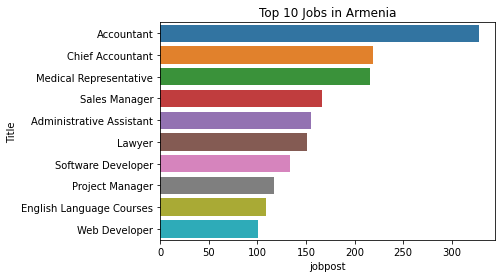

In [5]:
#Top 10 jobs in demand in Armenia
top_jobs = post_data[['Title','jobpost']].groupby('Title').count().nlargest(10, 'jobpost').reset_index()
sns.barplot(x = 'jobpost', y = 'Title', data = top_jobs)
plt.title('Top 10 Jobs in Armenia')
plt.show()

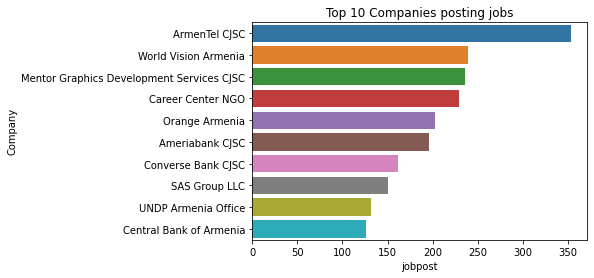

In [6]:
#Top 10 Companies posting jobs
top_comp = post_data[['Company','jobpost']].groupby('Company').count().nlargest(10, 'jobpost').reset_index()
sns.barplot(x = 'jobpost', y = 'Company', data = top_comp)
plt.title('Top 10 Companies posting jobs')
plt.show()

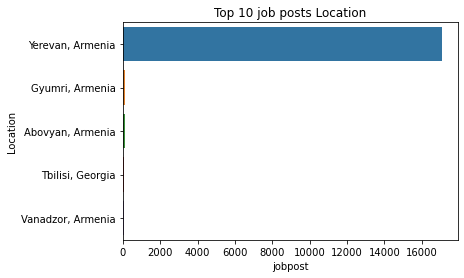

In [7]:
#Top 10 job posts Location
top_loc = post_data[['Location','jobpost']].groupby('Location').count().nlargest(5, 'jobpost').reset_index()
sns.barplot(x = 'jobpost', y = 'Location', data = top_loc)
plt.title('Top 10 job posts Location')
plt.show()

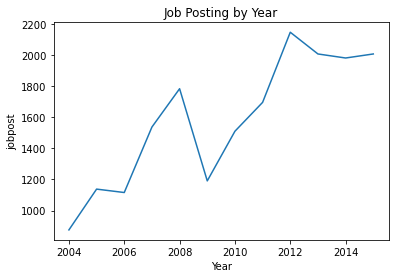

In [8]:
#Job Posting by Year
year_post = post_data[['Year','jobpost']].groupby('Year').count().reset_index()
sns.lineplot(x = 'Year', y = 'jobpost', data = year_post)
plt.title('Job Posting by Year')
plt.show()

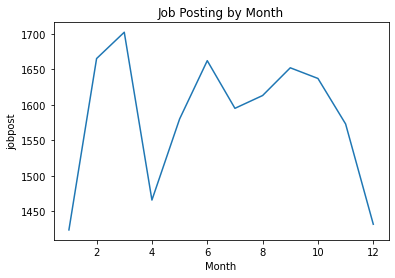

In [9]:
#Job Posting by Month
month_post = post_data[['Month','jobpost']].groupby('Month').count().reset_index()
sns.lineplot(x = 'Month', y = 'jobpost', data = month_post)
plt.title('Job Posting by Month')
plt.show()

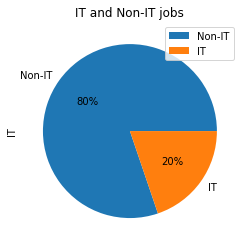

In [10]:
#IT and Non-IT jobs
post_data.IT.value_counts().plot(kind = 'pie', autopct='%1.0f%%', labels = ['Non-IT', 'IT'])
plt.legend()
plt.title('IT and Non-IT jobs')
plt.show()

#### <a> Data Preparation

In [11]:
#Selecting Significant Features
post_data = post_data[['jobpost', 'Title', 'Company', 'Location', 'JobDescription',
                       'JobRequirment', 'RequiredQual', 'AboutC', 'Year', 'Month', 'IT']]

In [12]:
#Missing Values in Datasets
post_data.isna().sum()

jobpost              0
Title               28
Company              7
Location            32
JobDescription    3892
JobRequirment     2522
RequiredQual       484
AboutC            6531
Year                 0
Month                0
IT                   0
dtype: int64

In [13]:
#Handling Missing Values
post_data = post_data.apply(lambda x: x.fillna(x.mode()[0]))

In [14]:
#Missing Values in Datasets
post_data.isna().sum()

jobpost           0
Title             0
Company           0
Location          0
JobDescription    0
JobRequirment     0
RequiredQual      0
AboutC            0
Year              0
Month             0
IT                0
dtype: int64

In [15]:
#Duplicate Rows
post_data[post_data.duplicated()]

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
1073,Clear Water\nTITLE: Assistant to Accountant/ ...,Assistant to Accountant/ Economist,Clear Water,"Yerevan, Armenia",The incumbent will work under the direct super...,- Take orders from clients;\n- Fill out invoic...,- Work experience in a relevant field;\n- Abbi...,Our company is dealing with clearing of drinki...,2005,2,False
1498,Save the Children Federation Inc. Armenia Fiel...,"Public Health Education, Information & Communi...",Save the Children Federation Inc. Armenia Fiel...,"Yerevan, Armenia",Save the Children is currently seeking experie...,- Coordinate development and dissemination of ...,"Demonstrated experience in project management,...",Save the Children is an independent organizati...,2005,7,False
2100,United Nations Development Program in Armenia\...,Annual Work Plan Coordinator on Multisectoral ...,United Nations Development Program in Armenia,"Yerevan, Armenia",Under the guidance and supervision of the UNDP...,- Coordinate activities of project managers an...,- Masters degree or equivalent in Business Adm...,Mentor Graphics Development Services CJSC is a...,2006,2,False
2522,Trade House Euroset\nTITLE: IT Unit Manager\n...,IT Unit Manager,Trade House Euroset,"Yerevan, Armenia",The incumbent will work under the direct super...,- Manage IT unit;\n- Manage IT unit budget;\n-...,- University degree in a related field; \n- Mi...,Euroset is a mobile handset retailer in Russia...,2006,6,True
4168,Synopsys Armenia CJSC\nTITLE: Software Engine...,Software Engineer,Synopsys Armenia CJSC,"Yerevan, Armenia",Synopsys Armenia CJSC is seeking for a Softwar...,Develop software for IC design on C++ under\nL...,- BS in CS/EE with at least 1 year of work exp...,"Synopsys, Inc. is a provider of electronic des...",2007,9,True
...,...,...,...,...,...,...,...,...,...,...,...
18034,"Questrade International Inc., Armenian Branch\...",C++ Engineer,"Questrade International Inc., Armenian Branch","Yerevan, Armenia",The C++ Engineer will participate in the devel...,"- Design, document and develop client-facing a...",- University Degree in Computer Science or a r...,For more information please visit: www.questra...,2015,7,False
18291,Converse Bank CJSC\n\n\nTITLE: Leading Specia...,"Leading Specialist, Legal Department",Converse Bank CJSC,"Yerevan, Armenia",Converse Bank is seeking a motivated and exper...,"- Draft writs, agreements and other legal docu...",- University degree in Law;\n- Excellent knowl...,"For information about Converse Bank CJSC, plea...",2015,8,False
18385,Beerevan LLC\n\n\nTITLE: Restaurant Manager\n...,Restaurant Manager,Beerevan LLC,"Yerevan, Armenia",The incumbent should maintain an efficient and...,"- Recruit, train and motivate the staff;\n- Or...",- Knowledge of business and management princip...,Beerevan LLC is a newly established beer resta...,2015,9,False
18472,Energize Global Services CJSC\n\n\nTITLE: Jav...,Java Software Development Training,Energize Global Services CJSC,"Yerevan, Armenia\n\n\nDETAIL DESCRIPTION: Ene...",The incumbent will work under the direct super...,- Participate in application design;\n- Provid...,- Excellent communication skills;\n- Good oral...,Energize Global Services CJSC is a software de...,2015,9,True


In [16]:
#Dropping duplicate rows
post_data.drop_duplicates(inplace = True, ignore_index = True)

In [17]:
#Converting Target feature from boolean to integer
post_data['IT'] = post_data.IT.astype(int)

### <a>Text Cleaning

#### <a>Converting Text to Lowercase

In [18]:
cols = post_data.select_dtypes('object').columns

In [19]:
post_data[cols] = post_data[cols].applymap(lambda x: x.lower())

In [20]:
post_data.head(2)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
0,ameria investment consulting company\njob titl...,chief financial officer,ameria investment consulting company,"yerevan, armenia",ameria investment consulting company is seekin...,- supervises financial management and administ...,"to perform this job successfully, an\nindividu...",mentor graphics development services cjsc is a...,2004,1,0
1,international research & exchanges board (irex...,full-time community connections intern (paid i...,international research & exchanges board (irex),"irex armenia main office; yerevan, armenia \nd...",the incumbent will work under the direct super...,- participate in application design;\n- provid...,- bachelor's degree; master's is preferred;\n-...,the international research & exchanges board (...,2004,1,0


#### <a>Converting Numbers to words

In [21]:
#UDF for converting numbers to words
eng = inflect.engine()

def num_convert(text):
    
    word_list = text.split()
    new_text = []
    
    for i in word_list:
        if i.isdigit():
            num =  eng.number_to_words(i)
            new_text.append(num)
        
        else:
            new_text.append(i)
    
    word_list = ' '.join(new_text)
    return word_list        

In [22]:
#post_data[cols] = post_data[cols].applymap(num_convert)

#### <a>Removing Digits

In [23]:
post_data[cols] = post_data[cols].applymap(lambda x: re.sub(r'\d', '', x))

In [24]:
post_data.head(2)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
0,ameria investment consulting company\njob titl...,chief financial officer,ameria investment consulting company,"yerevan, armenia",ameria investment consulting company is seekin...,- supervises financial management and administ...,"to perform this job successfully, an\nindividu...",mentor graphics development services cjsc is a...,2004,1,0
1,international research & exchanges board (irex...,full-time community connections intern (paid i...,international research & exchanges board (irex),"irex armenia main office; yerevan, armenia \nd...",the incumbent will work under the direct super...,- participate in application design;\n- provid...,- bachelor's degree; master's is preferred;\n-...,the international research & exchanges board (...,2004,1,0


#### <a>Removing Punctuations

In [25]:
post_data[cols] = post_data[cols].applymap(lambda x: x.translate(str.maketrans('','', string.punctuation)))

In [26]:
post_data.head(2)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
0,ameria investment consulting company\njob titl...,chief financial officer,ameria investment consulting company,yerevan armenia,ameria investment consulting company is seekin...,supervises financial management and administr...,to perform this job successfully an\nindividua...,mentor graphics development services cjsc is a...,2004,1,0
1,international research exchanges board irex\n...,fulltime community connections intern paid int...,international research exchanges board irex,irex armenia main office yerevan armenia \ndes...,the incumbent will work under the direct super...,participate in application design\n provide n...,bachelors degree masters is preferred\n excel...,the international research exchanges board ir...,2004,1,0


#### <a> Removing Single Characters

In [27]:
post_data[cols] = post_data[cols].applymap(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

In [28]:
post_data.head(2)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
0,ameria investment consulting company\njob titl...,chief financial officer,ameria investment consulting company,yerevan armenia,ameria investment consulting company is seekin...,supervises financial management and administr...,to perform this job successfully an\nindividua...,mentor graphics development services cjsc is s...,2004,1,0
1,international research exchanges board irex\n...,fulltime community connections intern paid int...,international research exchanges board irex,irex armenia main office yerevan armenia \ndes...,the incumbent will work under the direct super...,participate in application design\n provide n...,bachelors degree masters is preferred\n excel...,the international research exchanges board ir...,2004,1,0


#### <a>Removing Line Breaks and Extra Spaces

In [29]:
post_data[cols] = post_data[cols].applymap(lambda x: ' '.join(x.split()))

In [30]:
post_data.head(2)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
0,ameria investment consulting company job title...,chief financial officer,ameria investment consulting company,yerevan armenia,ameria investment consulting company is seekin...,supervises financial management and administra...,to perform this job successfully an individual...,mentor graphics development services cjsc is s...,2004,1,0
1,international research exchanges board irex ti...,fulltime community connections intern paid int...,international research exchanges board irex,irex armenia main office yerevan armenia descr...,the incumbent will work under the direct super...,participate in application design provide nece...,bachelors degree masters is preferred excellen...,the international research exchanges board ire...,2004,1,0


#### <a>Removing StopWords

In [31]:
def remove_stopwords(text): 
    sw = set(stopwords.words('English'))
    x = text.split()
    new_text = [i for i in x if i not in sw]
    return ' '.join(new_text)

In [32]:
post_data[cols] = post_data[cols].applymap(remove_stopwords)

In [33]:
post_data.head(2)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
0,ameria investment consulting company job title...,chief financial officer,ameria investment consulting company,yerevan armenia,ameria investment consulting company seeking c...,supervises financial management administrative...,perform job successfully individual must able ...,mentor graphics development services cjsc subs...,2004,1,0
1,international research exchanges board irex ti...,fulltime community connections intern paid int...,international research exchanges board irex,irex armenia main office yerevan armenia descr...,incumbent work direct supervision company pres...,participate application design provide necessa...,bachelors degree masters preferred excellent s...,international research exchanges board irex us...,2004,1,0


#### <a>Lemmitization

In [34]:
lemm = WordNetLemmatizer()
post_data[cols] = post_data[cols].applymap(lambda x: ' '.join([lemm.lemmatize(word, pos = 'v') for word in x.split()]))

In [35]:
post_data.head(2)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
0,ameria investment consult company job title ch...,chief financial officer,ameria investment consult company,yerevan armenia,ameria investment consult company seek chief f...,supervise financial management administrative ...,perform job successfully individual must able ...,mentor graphics development service cjsc subsi...,2004,1,0
1,international research exchange board irex tit...,fulltime community connections intern pay inte...,international research exchange board irex,irex armenia main office yerevan armenia descr...,incumbent work direct supervision company pres...,participate application design provide necessa...,bachelor degree master prefer excellent skills...,international research exchange board irex usb...,2004,1,0


### <a>WordClouds

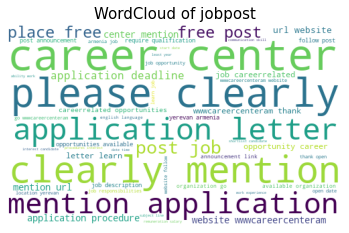

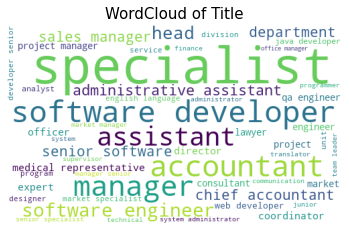

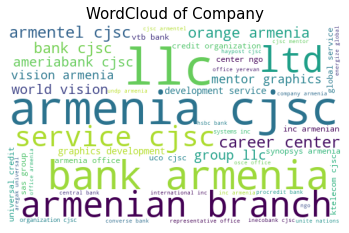

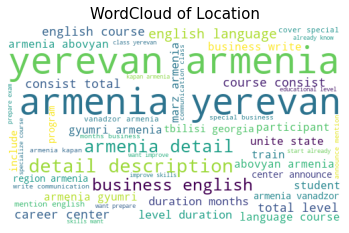

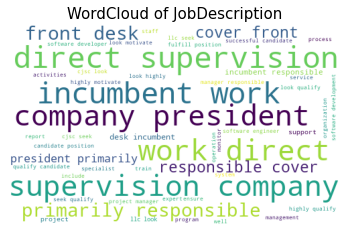

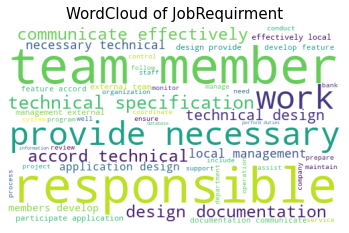

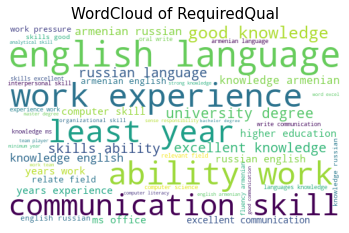

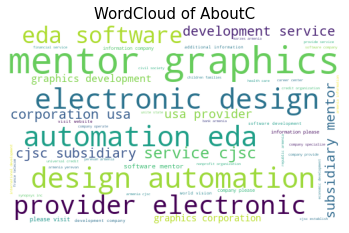

In [36]:
#WordClouds of post_data

for a, b in enumerate(cols):
    wd = WordCloud(
                    width=500, height=300,
                    max_words = 50, random_state = 123,
                    background_color = 'white', max_font_size = 75
                   ).generate(' '.join(post_data[b].astype(str)))
    
    plt.imshow(wd)
    plt.title('WordCloud of '+str(b), fontsize = 15)
    plt.axis('off')
    plt.show()

#### <a>Creating Data Term Matrix - DTM

In [37]:
X_data = post_data['RequiredQual']

In [38]:
#Initializing TfIdf Vectorizer
vect = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.95,
                stop_words = stopwords.words('english'))
X_tf = vect.fit_transform(X_data)

#Creating DTM dataframe
dtm = pd.DataFrame(X_tf.toarray(), columns = vect.get_feature_names())
dtm.head()

,ability,account,administration,advance,advantage,analysis,analytical,applications,armenia,armenian,asset,attention,bachelor,bank,basic,business,communication,complete,computer,data,database,deadlines,degree,demonstrate,design,desirable,desire,detail,develop,development,discipline,drive,economics,education,effectively,email,engineer,english,environment,equivalent,etc,excel,excellent,experience,familiarity,field,finance,financial,flexible,fluency,fluent,good,high,higher,highly,html,include,independently,information,international,internet,interpersonal,javascript,knowledge,language,languages,learn,least,legislation,level,linux,literacy,manage,management,market,master,meet,microsoft,minimum,ms,multiple,negotiation,network,new,office,oral,organizational,organizations,organize,orient,personality,plan,player,plus,position,prefer,preferable,preferably,presentation,pressure,previous,principles,problem,problemsolving,process,professional,proficiency,program,project,prove,public,relate,relevant,report,responsibility,russian,sales,science,sciences,sector,sense,server,service,similar,skills,social,software,solve,speak,sql,standards,strong,system,systems,task,team,technical,technologies,think,time,tool,train,travel,understand,university,use,verbal,web,well,willingness,windows,within,word,work,write,year,years
0,0.068702,0.392958,0.052419,0.000000,0.0,0.118826,0.083744,0.104466,0.000000,0.025628,0.0,0.0,0.00000,0.050854,0.000000,0.13487,0.025971,0.0,0.028318,0.0,0.059385,0.0,0.050793,0.056936,0.048010,0.0,0.0,0.053018,0.053102,0.040051,0.059232,0.060988,0.0,0.0,0.0,0.0,0.0,0.018793,0.0,0.0,0.0,0.0,0.077107,0.035847,0.000000,0.00000,0.286701,0.473382,0.0,0.041555,0.0,0.000000,0.000000,0.0,0.056101,0.0,0.199095,0.00000,0.115638,0.0,0.0,0.043345,0.0,0.055061,0.000000,0.000000,0.000000,0.000000,0.054311,0.000000,0.0,0.0,0.0,0.345317,0.0,0.052374,0.0,0.0,0.05192,0.000000,0.0,0.0,0.0000,0.0,0.0,0.00000,0.0,0.0,0.12094,0.0,0.0,0.111070,0.0,0.000000,0.0,0.049804,0.0,0.000000,0.0,0.0,0.0,0.354486,0.0,0.0,0.052981,0.0,0.0,0.000000,0.0,0.0,0.000000,0.037361,0.00000,0.160207,0.0,0.025782,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.077533,0.000000,0.080676,0.0,0.000000,0.000000,0.058112,0.033427,0.0,0.156515,0.0,0.032476,0.045694,0.000000,0.0,0.0,0.0,0.057298,0.0,0.0,0.00000,0.0,0.0,0.0,0.107612,0.00000,0.000000,0.0,0.046493,0.062108,0.030599,0.0,0.025193
1,0.109363,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.367165,0.0,0.0,0.24982,0.000000,0.000000,0.00000,0.124025,0.0,0.000000,0.0,0.000000,0.0,0.121283,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.269246,0.0,0.0,0.0,0.0,0.122743,0.171187,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.126315,0.000000,0.0,0.000000,0.0,0.000000,0.26464,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.118824,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.250116,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.237840,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.294888,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.185131,0.000000,0.000000,0.0,0.498212,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.155090,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.098866,0.146128,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.413642,0.182098,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.180452,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.133534,0.0,0.0,0.0,0.0,0.000000,0.382055,0.000000,0.22616,0.000000,0.000000,0.0,0.295266,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.130410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0

### <a>Prediction Model: If a job is IT or not

In [39]:
#Defining X and Y
X = dtm
Y = post_data['IT']

In [40]:
#Splitting Dataset into train and test dataset
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 123)

#### <a>Support Vector Classifier Model

In [41]:
#Executing Model
sv = SVC(C = 1, random_state = 123, probability = True).fit(train_x, train_y)

#Making prediction on train and test data
train_pred_sv = sv.predict(train_x)
test_pred_sv = sv.predict(test_x)

#Calculating log loss
log_sv = metrics.log_loss(test_y, sv.predict_proba(test_x))

In [42]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_sv))
print("AUC      : ", metrics.roc_auc_score(train_y, sv.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_sv = metrics.accuracy_score(test_y, test_pred_sv)
print("Accuracy : ", acc_score_sv)
auc_sv = metrics.roc_auc_score(test_y, sv.predict_proba(test_x)[:,1])
print("AUC      : ", auc_sv)
print("Log Loss : ", log_sv )

Model Performance
Train Dataset
Accuracy :  0.9599758344660927
AUC      :  0.9902777937022297

Test Dataset
Accuracy :  0.9365750528541226
AUC      :  0.9639714701178979
Log Loss :  0.17609088512978735


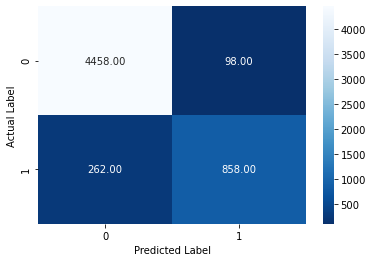

In [43]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_sv)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f', cmap = 'Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [44]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_sv))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4556
           1       0.90      0.77      0.83      1120

    accuracy                           0.94      5676
   macro avg       0.92      0.87      0.89      5676
weighted avg       0.94      0.94      0.93      5676



#### <a>Extra Tree Model

In [45]:
#Using GridSearchCV to get best fit parameters
pm = {
      'max_depth' : [10],
       'splitter' : ['best'],
      'max_features' : [10]
     }

gscv_et = GridSearchCV(estimator = ExtraTreeClassifier(random_state = 123), 
                    param_grid = pm,
                    cv = 10,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

In [46]:
#Using best fit parameters to fit the model
et = gscv_et.best_estimator_

#Making prediction on train and test data
train_pred_et = et.predict(train_x)
test_pred_et = et.predict(test_x)

#Calculating log loss
log_et = metrics.log_loss(test_y, et.predict_proba(test_x))

In [47]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_et))
print("AUC      : ", metrics.roc_auc_score(train_y, et.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_et = metrics.accuracy_score(test_y, test_pred_et)
print("Accuracy : ", acc_score_et)
auc_et = metrics.roc_auc_score(test_y, et.predict_proba(test_x)[:,1])
print("AUC      : ", auc_et)
print("Log Loss : ", log_et)

Model Performance
Train Dataset
Accuracy :  0.9120978704123244
AUC      :  0.9236914161312468

Test Dataset
Accuracy :  0.8928823114869626
AUC      :  0.8754156606672518
Log Loss :  0.6459169478907052


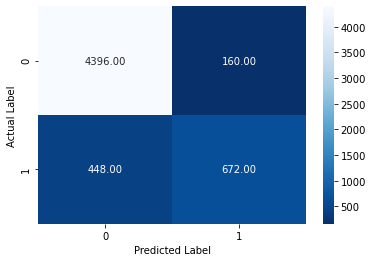

In [48]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_et)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f',
            
            cmap = 'Blues_r'    
           )
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [49]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_et))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      4556
           1       0.81      0.60      0.69      1120

    accuracy                           0.89      5676
   macro avg       0.86      0.78      0.81      5676
weighted avg       0.89      0.89      0.89      5676



#### <a>XG Boost Model

In [50]:
#Using GridSearchCV to get best fit parameters
pm = {
          'n_estimators' : [100],
          'learning_rate': [0.1]
     }

gscv_xg = GridSearchCV(estimator = XGBClassifier(random_state = 123), 
                    param_grid = pm,
                    cv = 10,
                    scoring = 'roc_auc',
                    n_jobs = -1).fit(train_x, train_y)

C:\Users\test123\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
#Using best fit parameters to fit the model
xg = gscv_xg.best_estimator_

#Making prediction on train and test data
train_pred_xg = xg.predict(train_x)
test_pred_xg = xg.predict(test_x)

#Calculating log loss
log_xg = metrics.log_loss(test_y, xg.predict_proba(test_x))

In [52]:
#Evaluating performance
print("Model Performance")
print("Train Dataset")
print("Accuracy : ", metrics.accuracy_score(train_y, train_pred_xg))
print("AUC      : ", metrics.roc_auc_score(train_y, xg.predict_proba(train_x)[:,1]))
print("")
print("Test Dataset")
acc_score_xg = metrics.accuracy_score(test_y, test_pred_xg)
print("Accuracy : ", acc_score_xg)
auc_xg = metrics.roc_auc_score(test_y, xg.predict_proba(test_x)[:,1])
print("AUC      : ", auc_xg)
print("Log Loss : ", log_xg)

Model Performance
Train Dataset
Accuracy :  0.9558979006192418
AUC      :  0.9862366156972736

Test Dataset
Accuracy :  0.9298801973220577
AUC      :  0.9601992662736737
Log Loss :  0.18536272186866665


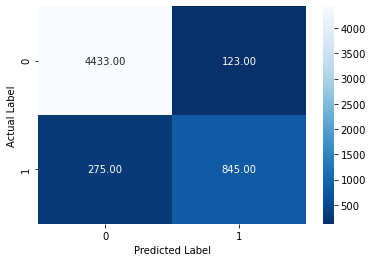

In [53]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(test_y, test_pred_xg)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f', cmap = 'Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [54]:
#Classification metrics scores of the model
print(metrics.classification_report(test_y, test_pred_xg))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4556
           1       0.87      0.75      0.81      1120

    accuracy                           0.93      5676
   macro avg       0.91      0.86      0.88      5676
weighted avg       0.93      0.93      0.93      5676



#### <a>Comparing metrics of each model

In [55]:
#Getting accuracy and log loss for each model
metric_data = pd.DataFrame({'Classifiers' : ['SupportVectorClassifier', 'ExtraTreeClassifier', 'XGBClassifier'],
                        'Accuracy %' : [acc_score_sv, acc_score_et, acc_score_xg],
                        'ROC_AUC_Score %' : [auc_sv, auc_et, auc_xg],    
                        'Log_Loss' : [log_sv, log_et, log_xg]})

In [56]:
metric_data[['Accuracy %','ROC_AUC_Score %']] = metric_data[['Accuracy %', 'ROC_AUC_Score %']].applymap(lambda x : round((x*100),3))

In [57]:
#metric_data.to_excel(output, 'Binomial Metric Data')
metric_data

,Classifiers,Accuracy %,ROC_AUC_Score %,Log_Loss
0,SupportVectorClassifier,93.658,96.397,0.176091
1,ExtraTreeClassifier,89.288,87.542,0.645917
2,XGBClassifier,92.988,96.020,0.185363


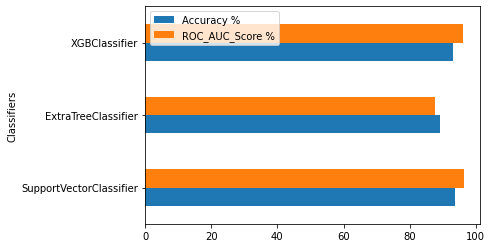

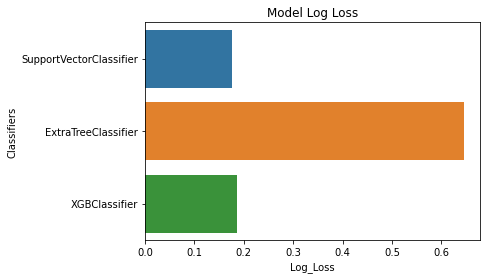

In [58]:
#Visualizing each model's accuracy and log loss metric
metric_data.plot(x = 'Classifiers', y = ['Accuracy %','ROC_AUC_Score %'], kind = 'barh')
plt.legend(loc = 2)
plt.show()

sns.barplot(data = metric_data, x = metric_data['Log_Loss'], y = metric_data.Classifiers)
plt.title('Model Log Loss')
plt.show()

<b>From above plots, Support Vector Classifier Model performs best. It has highest accuracy and ROC AUC Score and lowest log loss.

#### <a> Making Final Prediction 

In [59]:
#Making final prediction
post_data['pred_IT'] = sv.predict(X)

In [60]:
post_data[['jobpost', 'IT', 'pred_IT']].head()

,jobpost,IT,pred_IT
0,ameria investment consult company job title ch...,0,0
1,international research exchange board irex tit...,0,0
2,caucasus environmental ngo network cenn job ti...,0,0
3,manoff group job title bcc specialist position...,0,0
4,yerevan brandy company job title software deve...,1,1


### <a>K-Means Clustering - Finding Desired Characteristics and Skill-Sets 

In [61]:
X_data = post_data['RequiredQual']

In [62]:
#Initializing TfIdf Vectorizer
vect = TfidfVectorizer(min_df = 0.1, max_df = 0.9,
                       stop_words = stopwords.words('english'),
                       ngram_range = (1, 2))

X_vect = vect.fit_transform(X_data)
vocab = vect.get_feature_names()
vocab[:10]

['ability',
 'ability work',
 'account',
 'advance',
 'analytical',
 'armenian',
 'armenian english',
 'armenian russian',
 'bank',
 'basic']

In [63]:
#Using SVD to reduce dimensions
svd = TruncatedSVD(90)
nor = Normalizer(copy = False)
pp = make_pipeline(svd, nor)
X_red = pp.fit_transform(X_vect)

In [64]:
#Explained Variance of SVD
ev = svd.explained_variance_ratio_.sum()
print('Explained Variance of SVD: {}%'.format(int(ev*100)))

Explained Variance of SVD: 99%


In [65]:
#Making clusters
for n in range(5,11):
    cluster = KMeans(n_clusters = n)
    predictions = cluster.fit_predict(X_red)
        
    score = silhouette_score(X_red, predictions)
    print('For {} cluster, silhouette score = {}'.format(n, score))    

For 5 cluster, silhouette score = 0.057133355618823344
For 6 cluster, silhouette score = 0.058361576364692754
For 7 cluster, silhouette score = 0.05852222357872534
For 8 cluster, silhouette score = 0.05875394771992037
For 9 cluster, silhouette score = 0.061407149537298464
For 10 cluster, silhouette score = 0.0630522239651801


In [66]:
#K-Means model with n_clusters = 10 
km = KMeans(n_clusters = 10, n_init=100, random_state = 123)

In [67]:
#Fitting the model
model = km.fit(X_vect)
model

KMeans(n_clusters=10, n_init=100, random_state=123)

In [68]:
#Getting Vocabulary
vocab = np.array(vect.get_feature_names())

#Getting Cluster Centers
cc = np.array(model.cluster_centers_)

In [69]:
#Sorting Cluster Centers
sorted_cc = [cc[i].argsort() for i in range(0, cc.shape[0])]

In [70]:
#Getting Top 10 words from each cluster
words = []
for i in range(len(cc)):
    words.append(vocab[sorted_cc[i][-10:]])
    print('\n Cluster %d: '%i, vocab[sorted_cc[i][-10:]])
    
words = np.array(words)


 Cluster 0:  ['degree' 'university degree' 'university' 'work' 'armenian' 'russian'
 'languages' 'excellent' 'knowledge' 'skills']

 Cluster 1:  ['excellent' 'strong' 'work' 'management' 'knowledge' 'ability'
 'experience' 'business' 'skills' 'market']

 Cluster 2:  ['excellent' 'ability' 'software' 'experience' 'armenian' 'skills' 'work'
 'knowledge' 'finance' 'account']

 Cluster 3:  ['work' 'plus' 'program' 'ability' 'skills' 'software' 'knowledge'
 'development' 'design' 'experience']

 Cluster 4:  ['least years' 'field' 'degree' 'least' 'project' 'work' 'skills' 'years'
 'management' 'experience']

 Cluster 5:  ['team' 'excellent' 'skills ability' 'strong' 'knowledge' 'experience'
 'ability work' 'skills' 'work' 'ability']

 Cluster 6:  ['internet' 'languages knowledge' 'knowledge russian' 'basic'
 'skills good' 'learn' 'task' 'communication' 'skills'
 'communication skills']

 Cluster 7:  ['languages' 'russian' 'experience' 'excellent' 'work' 'skills'
 'knowledge' 'higher educat

In [71]:
#Adding Cluster labels to dataframe
post_data['Cluster'] = model.labels_

In [72]:
post_data[['RequiredQual', 'Cluster']].groupby('Cluster').count()

,RequiredQual
Cluster,
0,2949
1,852
2,1197
3,1909
4,2463
5,2876
6,547
7,2716
8,1089


In [73]:
post_data[['RequiredQual', 'Cluster']].head()

,RequiredQual,Cluster
0,perform job successfully individual must able ...,2
1,bachelor degree master prefer excellent skills...,5
2,degree environmentally relate field years rele...,4
3,advance degree public health social science co...,3
4,university degree economical background plus e...,9


### <a>Topic Modelling using LDA - Job Nature and Company Profiles

In [74]:
#Initializing Count Vectorizer
cv = CountVectorizer(min_df = 10, stop_words = 'english', token_pattern = '[a-zA-Z0-9]{3,}')
X_cv = cv.fit_transform(X_data)

In [75]:
lda = LDA( learning_method = 'online',
           random_state = 123, n_jobs = -1 )

X_lda = lda.fit_transform(X_cv)

In [76]:
#Getting log likelyhood(higher the better) and perplexity(lower the better)
print('Log Likelyhood: ', lda.score(X_cv))
print('\nPerplexity: ', lda.perplexity(X_cv))

Log Likelyhood:  -5350293.022940583

Perplexity:  351.9024816476545


In [77]:
#Getting LDA Model parameters
print(lda.get_params())

{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 123, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [78]:
#Getting Vocabulary
vocab_lda = np.array(cv.get_feature_names())

#Getting top 10 Words from each Topic
words = pd.DataFrame()

for i in range(len(lda.components_)):
    word_loc = lda.components_[i].argsort()[-10:]
    words['Topic '+str(i)] = vocab_lda[word_loc]

In [79]:
#Top 10 words dataframe from each topic
words = words.T
words

,0,1,2,3,4,5,6,7,8,9
Topic 0,language,ood,problems,adapt,knowledge,design,project,quality,work,ability
Topic 1,knowledge,service,player,team,customer,license,drive,personality,sales,market
Topic 2,armenian,languages,english,communication,experience,ability,knowledge,excellent,work,skills
Topic 3,degree,international,years,write,development,ability,project,skills,management,experience
Topic 4,language,plus,software,years,work,development,good,skills,knowledge,experience
Topic 5,skills,years,work,financial,armenian,experience,finance,bank,account,knowledge
Topic 6,knowledge,oral,task,write,learn,good,internet,email,communication,skills
Topic 7,pressure,deadlines,task,environment,multiple,personality,team,skills,work,ability
Topic 8,ability,knowledge,study,web,draw,experience,photoshop,asset,adobe,design
Topic 9,language,good,russian,languages,work,english,higher,education,experience,knowledge


#### <a>Using Word2vec to get similar words

In [80]:
#Train data
word_train = [nltk.word_tokenize(i) for i in post_data['jobpost'].values]

In [81]:
#Training Word2Vec model
model = Word2Vec(word_train, window=10)
word_vector = model.wv

In [82]:
#Getting Similar words
word_vector.most_similar('account')

[('bookkeeping', 0.5970668196678162),
 ('entries', 0.58730548620224),
 ('payable', 0.5562595725059509),
 ('ledger', 0.5557162761688232),
 ('payroll', 0.5544282793998718),
 ('tax', 0.5500016808509827),
 ('ifrs', 0.5271058082580566),
 ('yearend', 0.5114075541496277),
 ('reconciliation', 0.5059937238693237),
 ('financial', 0.503773033618927)]

### <a>Top 5 most similar Job Posting

In [83]:
#Using Job Title to find top 5 most similar jobs
word_data = post_data['Title'].drop_duplicates()

In [84]:
#Getting indices of the Job Title
indices = pd.Series(word_data.index, index = word_data)[:2000]

In [85]:
def get_similar_posts(word, cos_sim, indices):
    
    # Get the index of the job post that matches the job title
    idx = indices[word]
    
    # Getting similarity scores with indices
    ss = list(enumerate(cos_sim[idx]))
    
    # Sorting similarity scores
    ss.sort(key = lambda x: x[1], reverse = True)
    
    # Scores of 5 most similar Job Posts
    ss = ss[1:6]
    
    # Getting indices of top similar Job Posts
    word_idx = [i[0] for i in ss]
    
    # Returning top 5 similar Job Posts
    return post_data.iloc[word_idx]

In [86]:
#Initializing TF-IDF vector
tfidf = TfidfVectorizer(stop_words='english')

# Building TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(post_data['Title'][:2000])

# Getting similarity scores
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Getting top 5 similar Job Posts
res = get_similar_posts('technical project manager', cos_sim, indices)

res

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT,pred_IT,Cluster
95,unite nations development programme job title ...,project manager,unite nations development programme,yerevan armenia,undp ministry health seek professionals projec...,daily management project activities lead super...,advance university degree public health relate...,mentor graphics development service cjsc subsi...,2004,2,0,0,9
291,foundation internews georgia title project man...,project manager,foundation internews georgia,tbilisi georgia,foundation internews georgia seek qualify cand...,manage enhance implementation project prepare ...,university degree public administration politi...,mentor graphics development service cjsc subsi...,2004,5,0,0,3
394,lycos europe title project manager location ye...,project manager,lycos europe,yerevan armenia,project manager mainly project management admi...,plan follow project report progress risk devia...,least years experience project management pers...,lycos armenia currently employ employees since...,2004,7,0,0,4
560,international society fair elections democracy...,project manager,international society fair elections democracy...,tbilisi georgia,international society fair elections democracy...,lead coordinate organizations relations mass m...,university degree relevant field journalism po...,mentor graphics development service cjsc subsi...,2004,9,0,0,0
814,british council title project manager term ind...,project manager,british council,yerevan armenia,achieve objectives british councils se europe ...,excite opportunity someone understand mission ...,good knowledge andor experience education gove...,british council british governments official o...,2004,12,0,0,9
